In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('../spotify.csv', encoding='latin1')

print(df.columns)
df.dtypes

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [6]:

df['in_deezer_playlists'] = df['in_deezer_playlists'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype(int)
df['in_shazam_charts'] = df['in_shazam_charts'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['in_shazam_charts'].fillna(0, inplace=True)
df['in_shazam_charts'] = df['in_shazam_charts'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)
data = pd.get_dummies(df, columns=['key', 'mode'])


C:\Users\melis\AppData\Local\Temp\ipykernel_13332\479080320.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


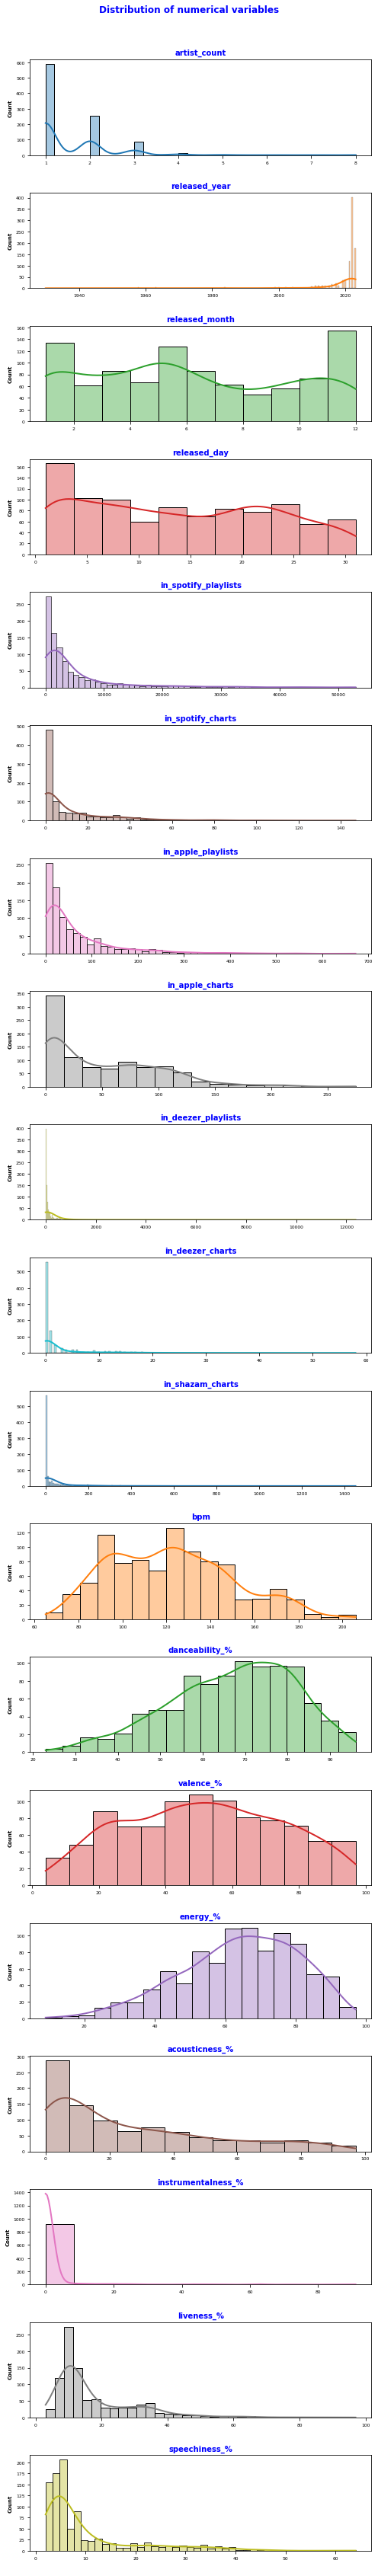

In [7]:

cat_cols = df.select_dtypes(include = ['object', 'category']).columns.to_list()
num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()
fig,axes = plt.subplots(20, 1, figsize = (7, 50))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 10, fontweight = 'bold', color = 'blue')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[19])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'blue')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

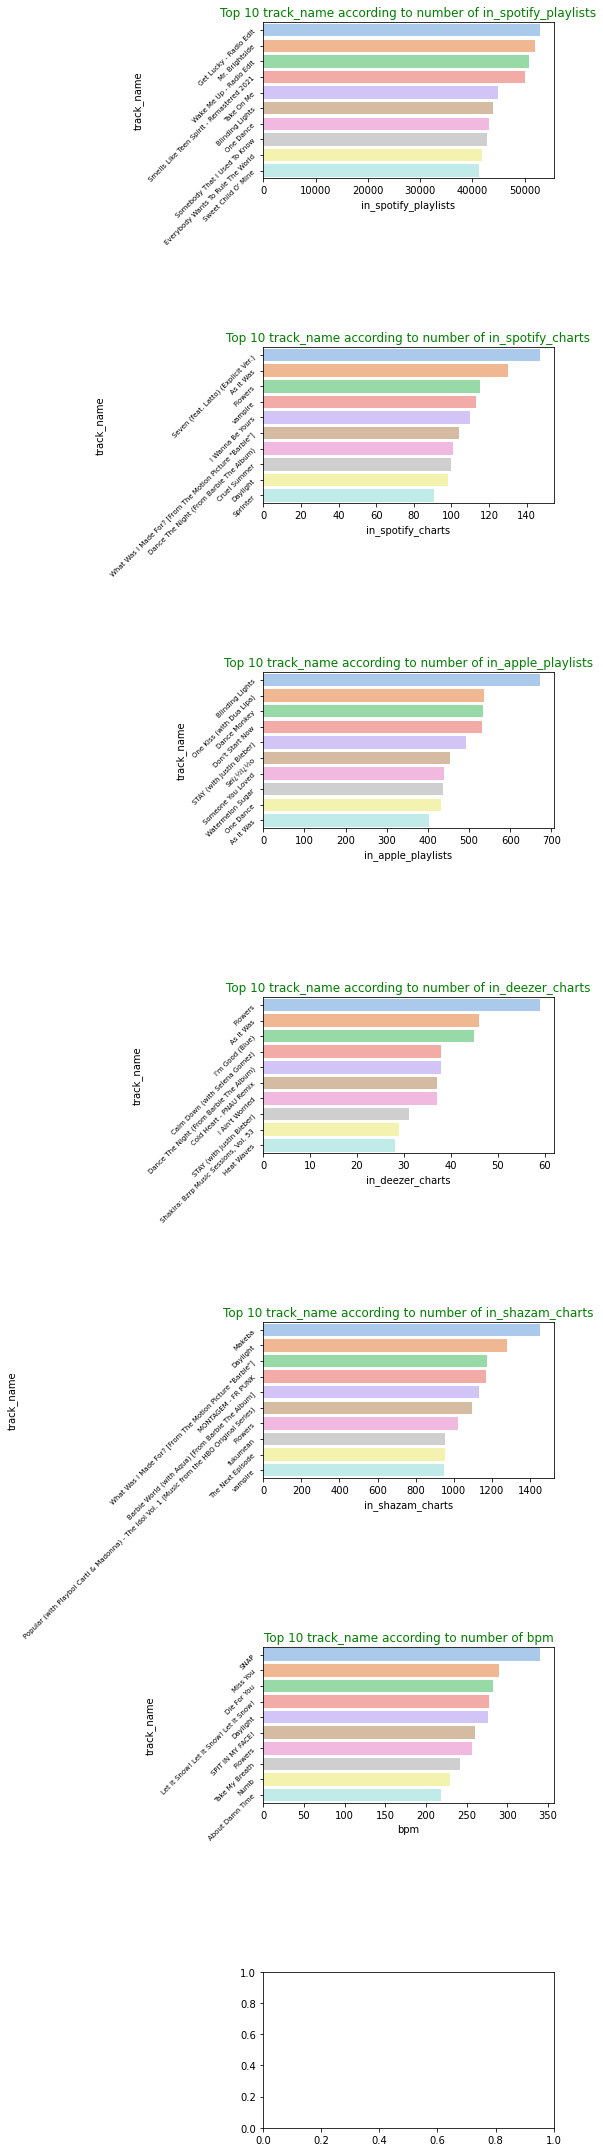

In [8]:
cols = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm']
fig, axes = plt.subplots(7, 1, figsize=(8, 30))

for ind, col in enumerate(cols):
    plt.subplot(7, 1, ind+1)
    df_top = df.groupby(['track_name'])[[col]].sum().reset_index()
    df_top = df_top.sort_values(by=(col), ascending=False).head(10)

    sns.barplot(y=df_top["track_name"], x=df_top[col], palette="pastel")
    plt.yticks(rotation=45, fontsize = 7)
    plt.title(f"Top 10 track_name according to number of {col}", fontsize = 12, color = 'green')

plt.tight_layout()

In [9]:
print(df['streams'].unique())
df.dtypes
import pandas as pd

# Convertir la colonne 'streams' en numérique
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])
df.reset_index(drop=True, inplace=True)
print(df['streams'].dtype)


['141381703' '133716286' '140003974' '800840817' '303236322' '183706234'
 '725980112' '58149378' '95217315' '553634067' '505671438' '58255150'
 '1316855716' '387570742' '2513188493' '1163093654' '496795686' '30546883'
 '335222234' '363369738' '86444842' '52135248' '1297026226' '200647221'
 '115364561' '78300654' '899183384' '61245289' '429829812' '127408954'
 '22581161' '52294266' '843957510' '999748277' '618990393' '123122413'
 '188933502' '1355959075' '786181836' '176553476' '354495408' '2808096550'
 '1109433169' '1047101291' '65156199' '570515054' '1085685420'
 '1647990401' '2565529693' '518745108' '107753850' '177740666' '153372011'
 '57876440' '1813673666' '3703895074' '256483385' '1214083358' '16011326'
 '812019557' '111947664' '156338624' '720434240' '357925728' '674072710'
 '1755214421' '404562836' '373199958' '14780425' '39578178' '54266102'
 '2557975762' '751134527' '2282771485' '1356565093' '1592909789'
 '635412045' '1230675890' '585695368' '43857627' '2009094673' '600976848

In [10]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz


X = df[['danceability_%', 'valence_%', 'energy_%',
        'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
y = df['streams']  

dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

dot_data = export_graphviz(dt_model, out_file=None, 
                           feature_names=X.columns,
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('decision_tree')  




'decision_tree.pdf'

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz


rf_model = RandomForestRegressor()
rf_model.fit(X, y)
tree = rf_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('random_forest')  



'random_forest.pdf'

In [13]:
from sklearn.metrics import r2_score


y_pred = rf_model.predict(X)

r2 = r2_score(y, y_pred)
print("Coefficient de détermination (R²) :", r2)


Coefficient de détermination (R²) : 0.8514249018909902


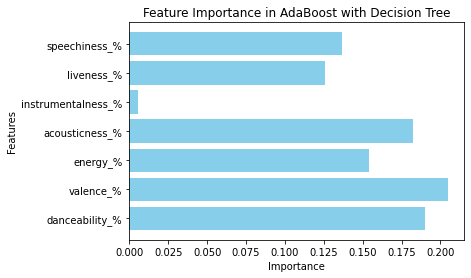

Coefficient de détermination (R²) : 0.9965692535401253


In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import joblib

adaboost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
adaboost_model.fit(X, y)
feature_importances = adaboost_model.feature_importances_
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in AdaBoost with Decision Tree')
plt.show()
y_pred = adaboost_model.predict(X)
r2 = r2_score(y, y_pred)
print("Coefficient de détermination (R²) :", r2)
joblib.dump(adaboost_model, 'modele_adaboost.pkl')


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import joblib


X = df[['danceability_%', 'valence_%', 'energy_%',
        'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
y = df['streams']  
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)
r2 = r2_score(y, y_pred)
print("Coefficient de détermination (R²) :", r2)
joblib.dump(linear_model, 'modele_lineaire.pkl')


Coefficient de détermination (R²) : 0.02907771884846111


['modele_lineaire.pkl']